In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [8]:
#Load ALT data
df = pd.read_csv('data/ALT (1).csv')

#Drop rows with missing values
df = df.dropna()

# Process timestamp as datatime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
# PErform ARIMA Prediction with 60 points as lookback and 5 as forecast
lookback = 60
forecast = 5

#Create a new dataframe with the columns we need
df2 = df[['timestamp', 'close', 'volume']]

#Create a new column with the difference between the current and previous close
df2['diff'] = df2['close'].diff()

#Create a new column with the difference between the current and previous volume
df2['diff_volume'] = df2['volume'].diff()

#Create a new column with the difference between the current and previous timestep
# df2['diff_timestamp'] = df2['timestamp'].diff()

#Create a new column with the difference between the current and previous close

/tmp/ipykernel_231132/1109644692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diff'] = df2['close'].diff()
/tmp/ipykernel_231132/1109644692.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diff_volume'] = df2['volume'].diff()


In [11]:
df2

,timestamp,close,volume,diff,diff_volume
0,2020-01-01 00:00:00+00:00,1.8900,5000,NaN,NaN
1,2020-01-02 14:00:00+00:00,1.8900,23496,0.0000,18496.0
2,2020-01-02 15:00:00+00:00,1.9000,27139,0.0100,3643.0
3,2020-01-02 16:00:00+00:00,1.9300,20526,0.0300,-6613.0
4,2020-01-02 17:00:00+00:00,1.8905,25687,-0.0395,5161.0
...,...,...,...,...,...
14661,2024-12-31 19:00:00+00:00,7.2089,156094,-0.0461,-43448.0
14662,2024-12-31 20:00:00+00:00,7.2200,437897,0.0111,281803.0
14663,2024-12-31 21:00:00+00:00,7.2303,363175,0.0103,-74722.0
14664,2024-12-31 22:00:00+00:00,7.2300,7189,-0.0003,-355986.0


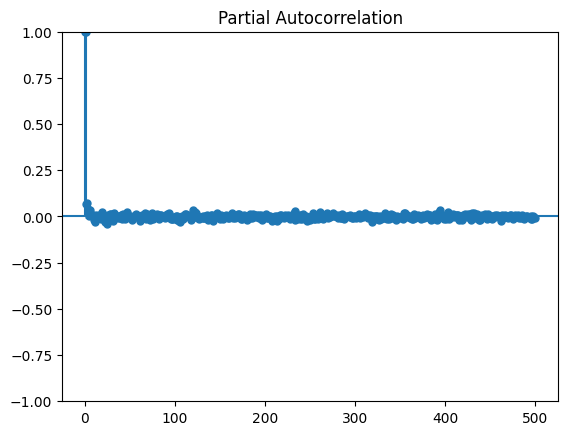

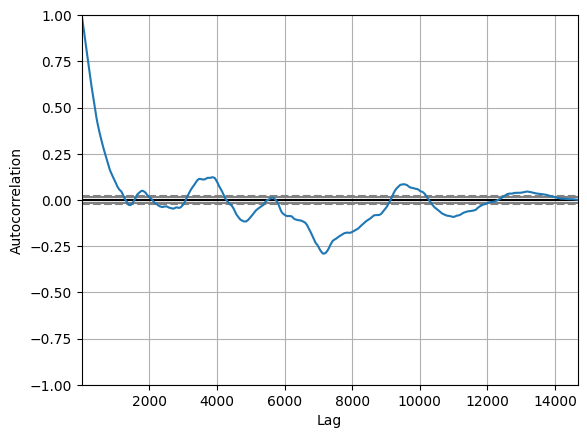

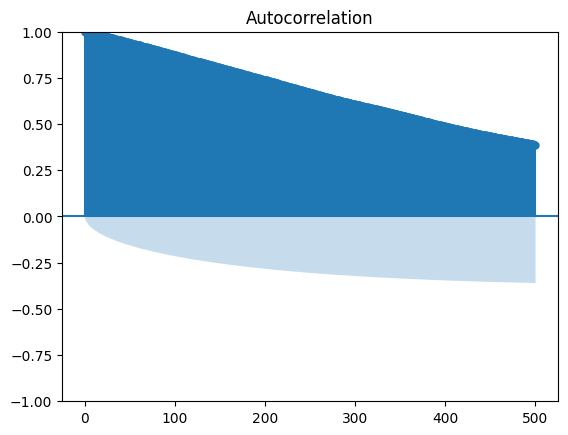

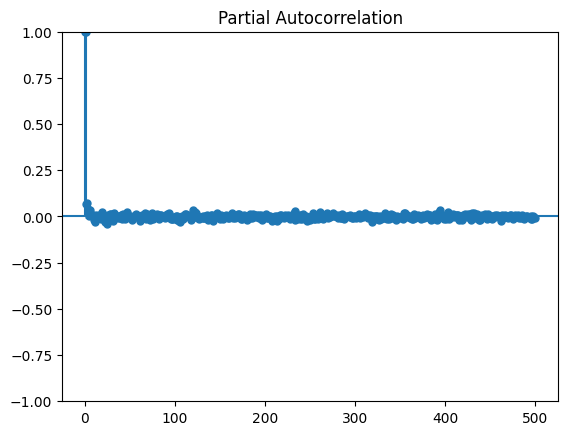

In [21]:
#  Do ARIMA 
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot the autocorrelation
autocorrelation = autocorrelation_plot(df2['close'])

plot_acf(df2['close'], lags=500)
plot_pacf(df2['close'], lags=500)

In [23]:
# Using the Arima model to select 95% of correlation
model = ARIMA(df2['close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                14666
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2463.628
Date:                Sat, 22 Feb 2025   AIC                           4939.256
Time:                        15:13:14   BIC                           4984.816
Sample:                             0   HQIC                          4954.389
                              - 14666                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0777      0.002    -31.889      0.000      -0.082      -0.073
ar.L2         -0.0804      0.002    -32.842      0.000      -0.085      -0.076
ar.L3         -0.0462      0.004    -12.717      0.0

In [ ]:
model_fit.predict(start=0, end=20)

0     0.000000
1     1.890000
2     1.890000
3     1.899258
4     1.926891
5     1.890767
6     1.928658
7     1.918891
8     1.919347
9     1.930758
10    1.918671
Name: predicted_mean, dtype: float64

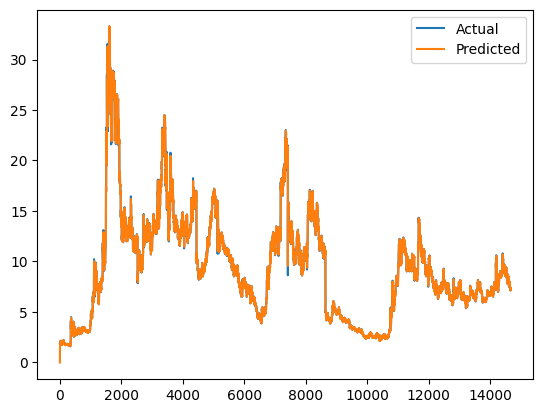

In [30]:
#  Using the ARIMA model to predict the next 5 points for all data points
X_train = df2['close'].values
X_test = df2['close'].values
predictions = []
model = ARIMA(X_train, order=(5,1,0))
model_fit = model.fit()
for i in range(0, len(X_test), forecast):
    pred = model_fit.predict(start=i, end=i+forecast-1)
    predictions.extend(pred)
    
    
predictions = predictions[:len(X_test)] 
# PLot Actual adn Predicted values
plt.plot(X_test)
plt.plot(predictions)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [31]:
# Compute MSE,RMSE and MAE to evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test, predictions)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(X_test - predictions))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)



MAE: 0.13959030898899472
MSE: 0.08216785858542117
RMSE: 0.2866493652276613
